In [2]:
# 1. Load our time series
# 2. "Convert" it so it can be used with xgboost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
import seaborn

In [5]:
!pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 16.3 MB/s eta 0:00:00


In [6]:
df = pd.read_csv("./44g_milk.csv")

In [7]:
df.head()

,date,milk
0,1/2/2021,20
1,1/2/2021,30
2,1/3/2021,4
3,1/4/2021,10
4,1/4/2021,10


In [8]:
df.tail()

,date,milk
3480,11/30/2022,10
3481,11/30/2022,20
3482,11/30/2022,30
3483,11/30/2022,10
3484,11/30/2022,10


In [9]:
# Converting date from string to datetime to make it usable for time-series analysis.
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


In [10]:
# Resampling to daily data and extract year, month, and week features.

df_day = df.resample('D').sum()
df_day = df_day.reset_index(drop=False)

df_day['year'] = df_day['date'].dt.year
df_day['month'] = df_day['date'].dt.month
df_day['week_of_year'] = df_day['date'].dt.isocalendar().week #dt.week is deprecated. Use dt.isocalendar().week

In [11]:
df_day.head()

,date,milk,year,month,week_of_year
0,2021-01-02,50,2021,1,53
1,2021-01-03,4,2021,1,53
2,2021-01-04,110,2021,1,1
3,2021-01-05,170,2021,1,1
4,2021-01-06,152,2021,1,1


In [12]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          698 non-null    datetime64[ns]
 1   milk          698 non-null    int64         
 2   year          698 non-null    int32         
 3   month         698 non-null    int32         
 4   week_of_year  698 non-null    UInt32        
dtypes: UInt32(1), datetime64[ns](1), int32(2), int64(1)
memory usage: 19.9 KB


In [13]:
!pip install calplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for calplot: filename=calplot-0.1.7.5-py3-none-any.whl size=8115 sha256=6f309df0e922fd196928872e00dfad3eb4e64b2c90ec1b328e38ffebc745e34d
  Stored in directory: /root/.cache/pip/wheels/f1/eb/af/79f8750a9f757aa0ccb6a0e217515abf3892f989345e98e50c
Successfully built calplot


In [14]:
df_day_y21 = df_day[(df_day['year']==2021)]
df_day_y21.set_index('date', inplace=True)


(<Figure size 1250x170 with 2 Axes>,
 array([<Axes: ylabel='2021'>], dtype=object))

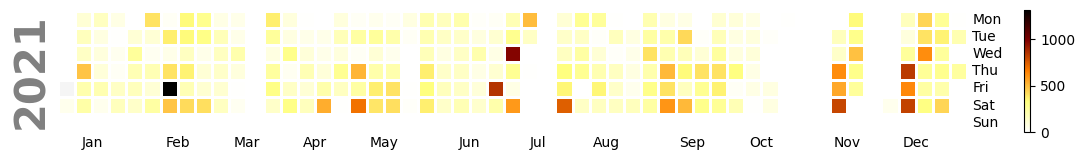

In [15]:
import calplot
calplot.calplot(df_day_y21["milk"], edgecolor= None, cmap='afmhot_r')
#In 2021, milk production isn’t constant, there are seasonal ups and downs throughout the year.

(<Figure size 1250x170 with 2 Axes>,
 array([<Axes: ylabel='2022'>], dtype=object))

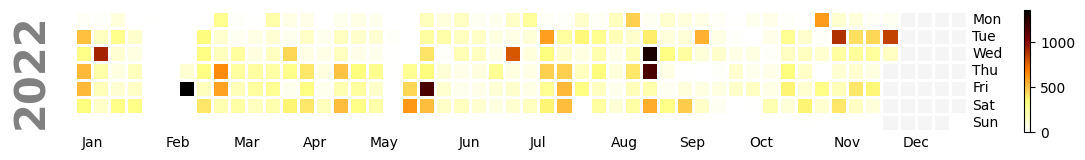

In [16]:
df_day_y22 = df_day[(df_day['year']==2022)]
df_day_y22.set_index('date', inplace=True)
calplot.calplot(df_day_y22["milk"], edgecolor= None, cmap='afmhot_r')
#In 2022, milk production is more irregular, with several sudden increases on certain days.

In [17]:
# Resampling the data to monthly totals and extract year, month, and week features.
df_month = df.resample('M').sum()
df_month = df_month.reset_index(drop=False)

df_month['year'] = df_month['date'].dt.year
df_month['month'] = df_month['date'].dt.month
df_month['week_of_year'] = df_month['date'].dt.isocalendar().week #dt.week is deprecated. Use dt.isocalendar().week

/tmp/ipython-input-2926733023.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_month = df.resample('M').sum()


In [18]:
df_month.head()

,date,milk,year,month,week_of_year
0,2021-01-31,3431,2021,1,4
1,2021-02-28,6852,2021,2,8
2,2021-03-31,3181,2021,3,13
3,2021-04-30,3990,2021,4,17
4,2021-05-31,5373,2021,5,22


In [19]:
# Comparing monthly milk production between 2021 and 2022
eda_df = df_month.pivot(index='month', columns='year', values='milk')
eda_df.head()

year,2021,2022
month,,
1,3431.0,5870.0
2,6852.0,3380.0
3,3181.0,5771.0
4,3990.0,5080.0
5,5373.0,5490.0


<Axes: xlabel='month'>

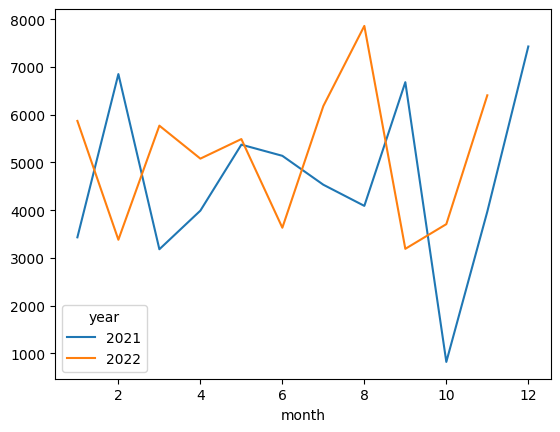

In [20]:
eda_df.plot(kind='line')

<Axes: xlabel='month'>

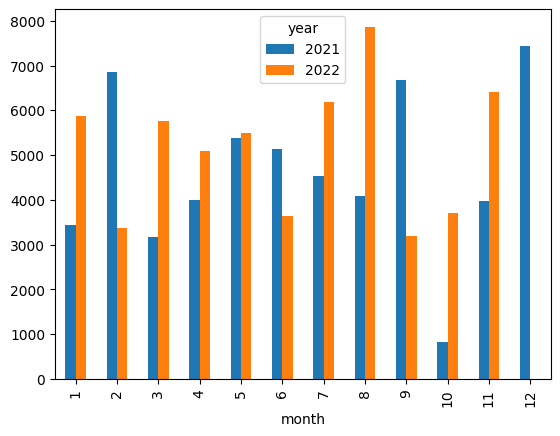

In [21]:
eda_df.plot(kind='bar')

In [22]:
# Resampling the data to weekly totals and extract year, month, and week features.

df_week = df.resample('M').sum()
df_week = df_week.reset_index(drop=False)

df_week['year'] = df_week['date'].dt.year
df_week['month'] = df_week['date'].dt.month
df_week['week_of_year'] = df_week['date'].dt.isocalendar().week #dt.week is deprecated. Use dt.isocalendar().week

/tmp/ipython-input-3737729488.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_week = df.resample('M').sum()


In [23]:
df_week.set_index('date', inplace=True)
df_week.head()

,milk,year,month,week_of_year
date,,,,
2021-01-31,3431,2021,1,4
2021-02-28,6852,2021,2,8
2021-03-31,3181,2021,3,13
2021-04-30,3990,2021,4,17
2021-05-31,5373,2021,5,22


In [24]:
df_week = df.resample('W').sum()
Cmilk_df = df_week['milk']


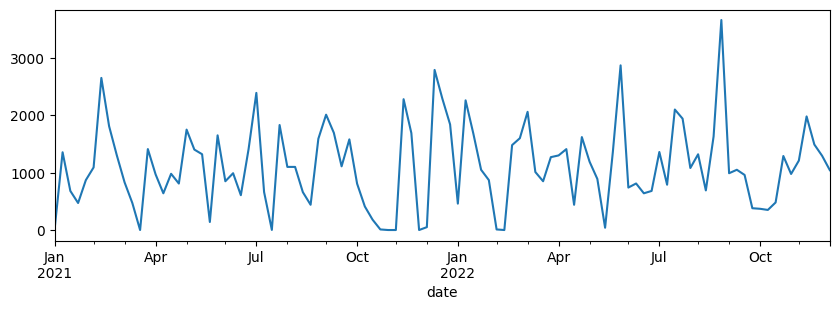

In [25]:
Cmilk_df.plot(figsize=(10,3))
plt.show()

In [26]:
!pip3 install statsmodels

In [27]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(Cmilk_df.values.flatten())

print('ADF statistic: %f' % result[0])
print('p-value: %f' % result[1])
# p value <0.05 => we can reject the null hyphothesis and we can say for sure that we have stationarity



ADF statistic: -7.685424
p-value: 0.000000


In [ ]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split


test_size = 12 # 12 week(3 month)
window_lenght = 52

y = Cmilk_df.squeeze()

y_train, y_test = temporal_train_test_split(y, test_size= test_size)
fh =  ForecastingHorizon(y_test.index, is_relative=False)


In [ ]:
y_test

In [ ]:
fh

In [ ]:
len(y_test)

In [ ]:
# AutoARIMA
# KNeighborsRegressor
# Linear Regression
# XGBoost



# AutoARIMA

In [ ]:
!pip install pmdarima

In [ ]:
!pip install pmdarima
import pmdarima as pm
from sktime.forecasting.arima import AutoARIMA

forecaster = AutoARIMA(start_p=8, max_p=9)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, label=["y_train", "y_test", "y_pred"])


In [45]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
print('Mape: %.4f' % mean_absolute_percentage_error(y_test, y_pred,symmetric=False))
# error rate will be around 0.70 - 0.75



Mape: 0.7877


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='milk'>)

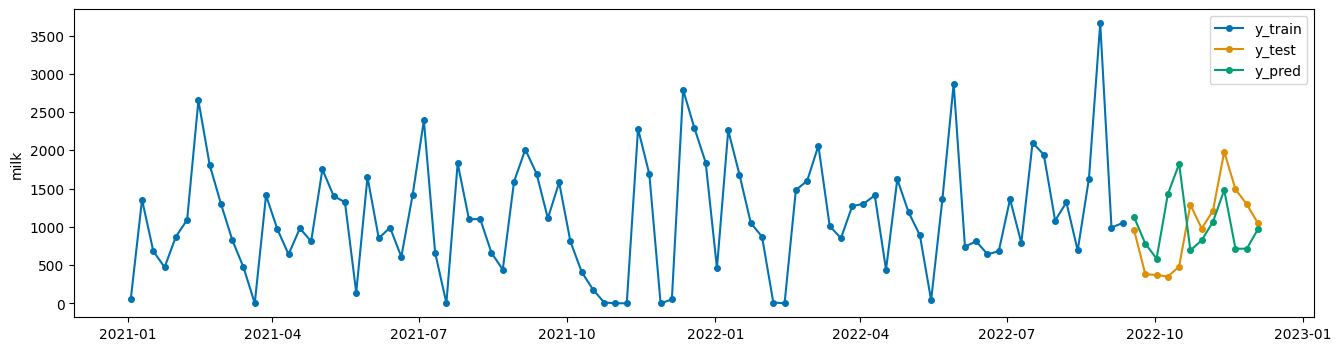

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction
from sktime.utils.plotting import plot_series

regressor = KNeighborsRegressor(n_neighbors=3) # 3,5,10

forecaster = make_reduction(regressor, strategy='recursive', window_length= window_lenght)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

# With k=3, the model follows the test data well, but it becomes noisy because it reacts too much to small changes.

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='milk'>)

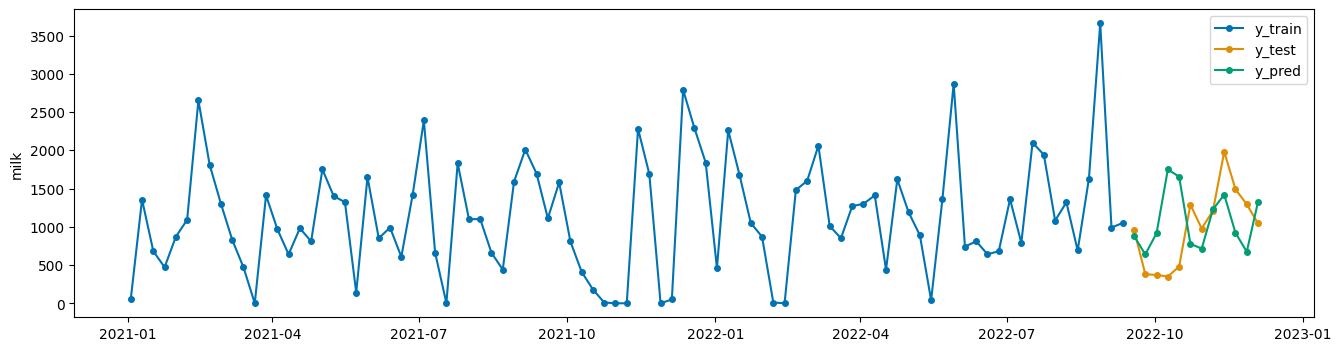

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction
from sktime.utils.plotting import plot_series

regressor = KNeighborsRegressor(n_neighbors=5) # 3,5,10

forecaster = make_reduction(regressor, strategy='recursive', window_length= window_lenght)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
# With k=5, the model is more balanced, reducing noise while keeping the main trend, it stays very close to the test data.

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='milk'>)

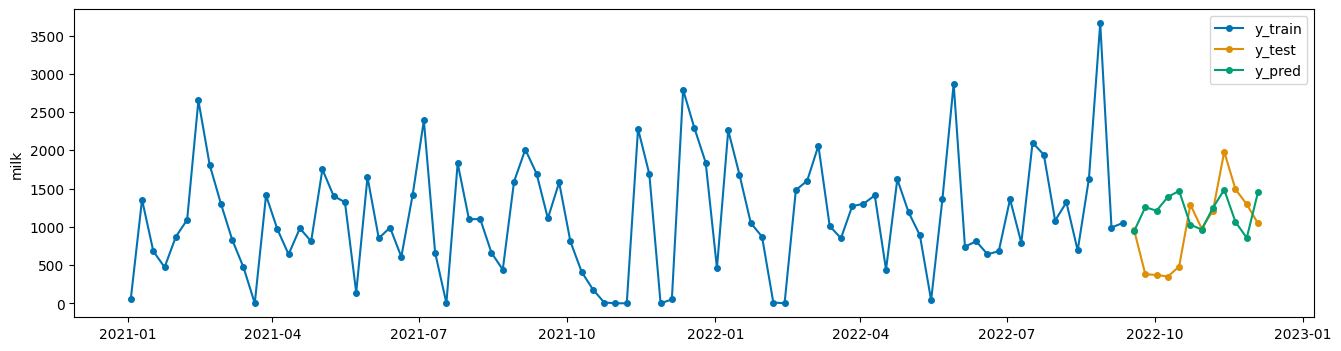

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction
from sktime.utils.plotting import plot_series

regressor = KNeighborsRegressor(n_neighbors=10) # 3,5,10

forecaster = make_reduction(regressor, strategy='recursive', window_length= window_lenght)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

# With k=10, the model gets too smooth and misses short-term changes, so the predictions fall behind the real values.


#OBSERVATIONS
#Even though the visual differences between k=3, k=5 and k=10 are small due to the short test period, k=3 produces slightly more noisy predictions and k=10 becomes too smooth.
# k=5 provides the most balanced result and stays closest to the test values, so i think k=5 is the best model.


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='milk'>)

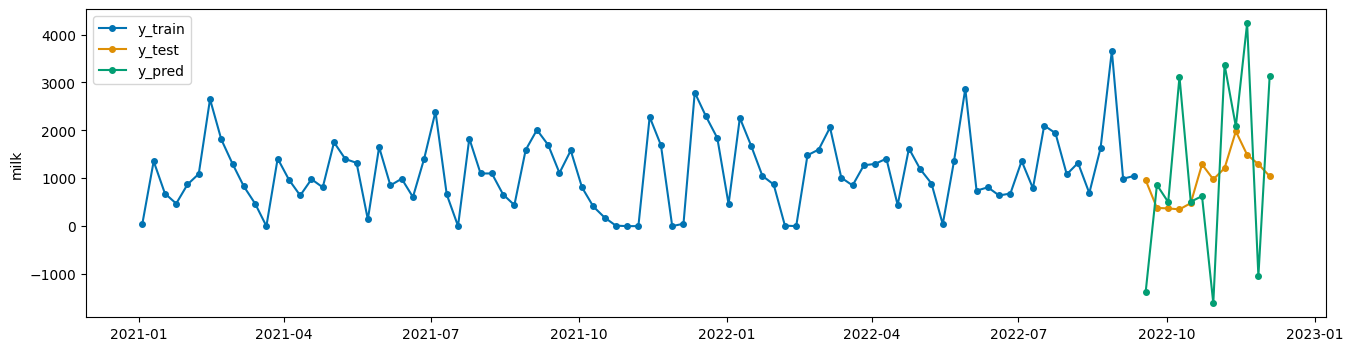

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

forecaster = make_reduction(regressor, strategy='recursive', window_length= window_lenght)
forecaster.fit(y_train)
y_pred=forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

# Linear Regression doesn’t perform well, since the predictions don’t follow the trend.

In [40]:
!pip install xgboost

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='milk'>)

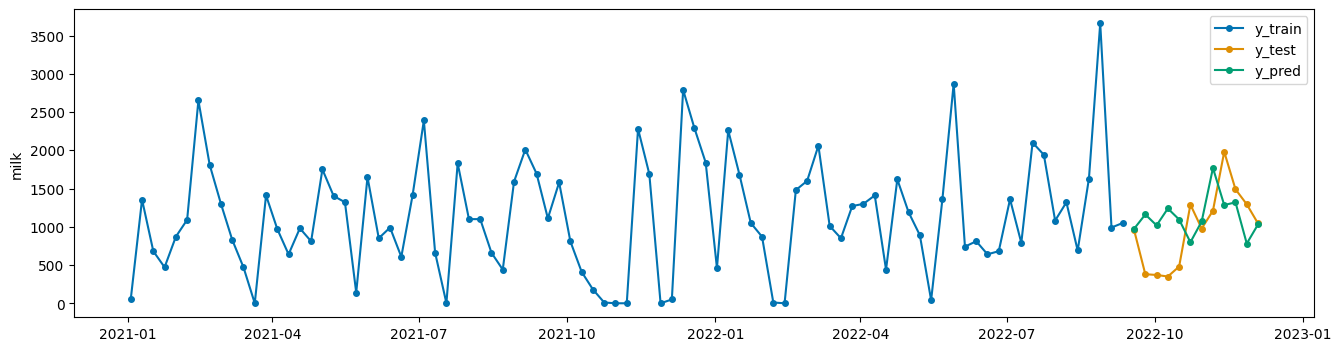

In [42]:
from xgboost import XGBRegressor
regressor = XGBRegressor(objective='reg:squarederror', random_state=2411)

forecaster = make_reduction(regressor, strategy='recursive', window_length= 12,)
forecaster.fit(y=y_train)
y_pred = forecaster.predict(fh=fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
#XGBoost performs better than Linear Regression, because the predictions look more closer to the test values.